# Basic Usage

You can use ``fast_hdbscan`` as a drop in replacement for ``hdbscan`` for any basic usage of ``hdbscan`` on data with Euclidean distances. That is, ``fast_hdbscan`` uses the exact same interface as ``hdbscan`` and a subset of the parameters -- so whenever you are using ``hdbscan`` with the only parameters that ``fast_hdbscan`` supports then you can simply swap them. Let's load libraries and grab some data to demonstrate:

In [1]:
import numpy as np
import fast_hdbscan

import requests
from io import BytesIO
import seaborn as sns

sns.set(rc={"figure.figsize":(8,8)})
data_request = requests.get(
    "https://github.com/scikit-learn-contrib/hdbscan/blob/master/notebooks/clusterable_data.npy?raw=true"
)
data = np.load(BytesIO(data_request.content))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Before we do any clustering lets plot the data so we can see what we are trying to cluster:

<AxesSubplot: >

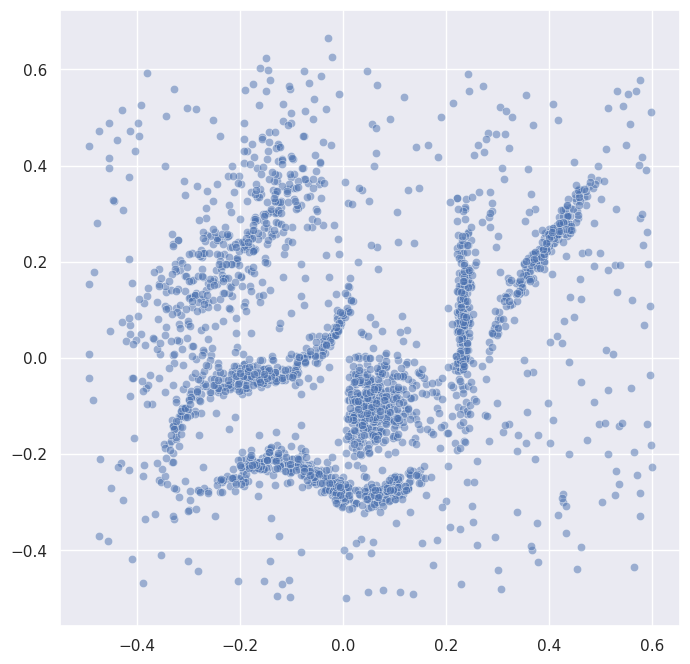

In [2]:
sns.scatterplot(x=data.T[0], y=data.T[1], alpha=0.5)

To use ``fast_hdbscan`` you can apply it exactly as you would ``hdbscan``. In this case, following the approach taken by ``hdbscan`` in its documentation, we'll use a ``min_cluster_size`` of 15 and call ``fit_predict`` on the data we wish to cluster.

In [3]:
cluster_labels = fast_hdbscan.HDBSCAN(min_cluster_size=15).fit_predict(data)

We can then plot the results to see what we are, in fact, performing a standard HDBSCAN clustering -- just with full multicore support.

<AxesSubplot: >

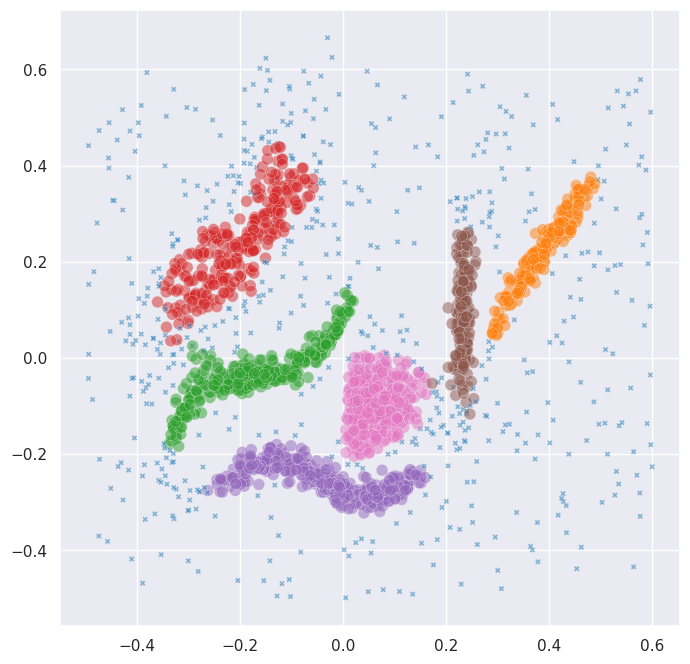

In [4]:
sns.scatterplot(
    x=data.T[0], 
    y=data.T[1], 
    alpha=0.5,
    hue=cluster_labels, 
    style=cluster_labels<0,
    size=cluster_labels<0,
    palette="tab10", 
    legend=False
)

And that's all there is to it in terms of getting started with ``fast_hdbscan``. Do note, however, that if you want to use ``hdbscan`` features such as support for precomputed distances matrics, metrics other than Euclidean, prediction or soft clustering etc. then you'll need to fall back to the ``hdbscan`` library. The goal of this library is to run on the common case (large volumes of low dimensional Euclidean data) as fast as possible with full multicore support.